In [19]:
%matplotlib inline

In [20]:
# 1.Read in the gapminder_clean.csv data as a pandas DataFrame.
import pandas as pd
df = pd.read_csv(r"C:\Users\User\Downloads\gapminder_clean.csv")

In [21]:
# 2. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.
# Filter the data to include only rows where Year is 1962 
# and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data
df_1962 = df[df["Year"] == 1962]

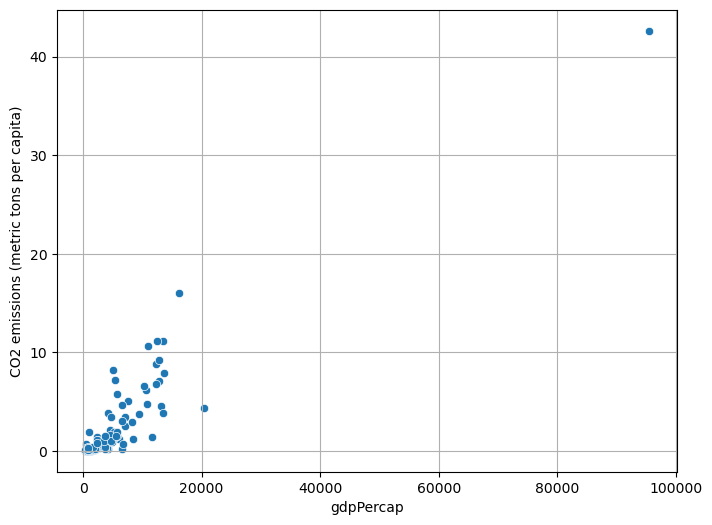

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,6))
sns.scatterplot(
    data = df_1962,
    x = "gdpPercap",
    y = "CO2 emissions (metric tons per capita)")
plt.title = "CO2 emissions vs gdpPercap"
plt.xlabel = "gdpPercap"
plt.ylalbel = "CO2 emissions (metric tons per capita)"
plt.grid(1)
plt.show()

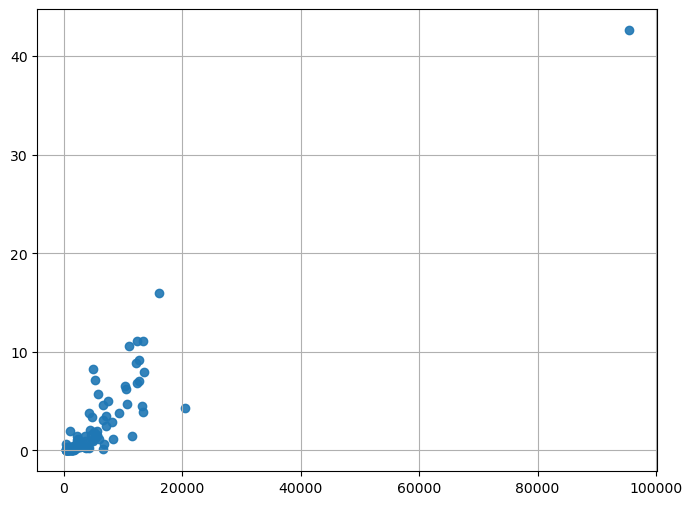

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,6))
plt.scatter(
    df_1962["gdpPercap"],
    df_1962["CO2 emissions (metric tons per capita)"],
    alpha = 0.9)
plt.title = "CO2 emissions vs gdpPercap"
plt.xlabel = "gdpPercap"
plt.ylalbel = "CO2 emissions (metric tons per capita)"
plt.grid(1)
plt.show()

In [24]:
# 3. On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value?
from scipy.stats import pearsonr
subset = df_1962[["gdpPercap","CO2 emissions (metric tons per capita)"]].dropna()
corr, pval = pearsonr(subset["gdpPercap"], subset["CO2 emissions (metric tons per capita)"])
print(f"Correlation coefficient: {corr: .4f}")
print(f"P value: {pval: .4e}")

Correlation coefficient:  0.9261
P value:  1.1287e-46


In [25]:
# 4. On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...
df_cln = df.dropna(subset = ['gdpPercap', 'CO2 emissions (metric tons per capita)'])
cors = []
for year, group in df_cln.groupby("Year"):
    corr, _ = pearsonr(group["gdpPercap"], group["CO2 emissions (metric tons per capita)"])
    cors.append((year, corr))
corr_df = pd.DataFrame(cors, columns = ['Year', 'Correlations'])
max_cor_row = corr_df.loc[corr_df['Correlations'].idxmax()]
best_year = max_cor_row['Year']
best_corr = max_cor_row['Correlations']
df_best = df[df['Year'] == best_year]
print(best_year)


1967.0


In [26]:
# 5. Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.
%pip install -q kaleido

import plotly.express as px
fig = px.scatter(
    df_best,
    x='gdpPercap',
    y='CO2 emissions (metric tons per capita)',
    size='pop',
    color='continent',
    size_max=40,
    title='GDP vs CO2 Emissions (size = population)'
)
fig.write_image("1.png")
fig.show()

Note: you may need to restart the kernel to use updated packages.


In [27]:
# 1. What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df_c = df.dropna(subset=['continent', 'Energy use (kg of oil equivalent per capita)'])
summary = df_c.groupby('continent')['Energy use (kg of oil equivalent per capita)'].describe()
display(summary)

groups = [group['Energy use (kg of oil equivalent per capita)'].values
          for name, group in df_c.groupby('continent')]
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")


,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,199.0,698.516783,627.356473,9.715410,375.184208,449.521247,745.393302,3071.774832
Americas,188.0,1703.620453,2377.181918,219.075497,556.033108,749.029108,1384.585146,14608.009868
Asia,185.0,1867.280336,2590.043514,86.903767,345.370792,760.140852,1987.087308,12122.050603
Europe,256.0,3146.062066,1733.880414,350.101258,2073.999447,3027.931793,4034.557831,14746.031339
Oceania,20.0,3980.314420,1123.410756,1791.461322,3143.501420,4044.850674,4783.650230,5868.347097


ANOVA F-statistic: 51.4592
P-value: 8.5270e-39


In [28]:
# Tukey post-hoc test
tukey = pairwise_tukeyhsd(
    endog=df_c['Energy use (kg of oil equivalent per capita)'],
    groups=df_c['continent'],
    alpha=0.05
)
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
print(tukey_df)

     group1    group2   meandiff   p-adj      lower      upper  reject
0    Africa  Americas  1005.1037  0.0000   466.8326  1543.3748    True
1    Africa      Asia  1168.7636  0.0000   628.2529  1709.2742    True
2    Africa    Europe  2447.5453  0.0000  1947.3838  2947.7067    True
3    Africa   Oceania  3281.7976  0.0000  2040.3410  4523.2543    True
4  Americas      Asia   163.6599  0.9256  -384.4160   711.7357   False
5  Americas    Europe  1442.4416  0.0000   934.1141  1950.7691    True
6  Americas   Oceania  2276.6940  0.0000  1031.9249  3521.4630    True
7      Asia    Europe  1278.7817  0.0000   768.0834  1789.4801    True
8      Asia   Oceania  2113.0341  0.0000   867.2950  3358.7732    True
9    Europe   Oceania   834.2524  0.3422  -394.5176  2063.0223   False


In [29]:
fig = px.box(
    df_c,
    x='continent',
    y='Energy use (kg of oil equivalent per capita)',
    color='continent',
    title='Energy Use per Capita by Continent',
    points='all'
)
fig.write_image("2.png")
fig.show()

In [30]:
# 2. Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)

import plotly.express as px
from scipy.stats import ttest_ind, levene, shapiro

# Filtered data
filtered = df[
    (df['continent'].isin(['Europe', 'Asia'])) &
    (df['Year'] > 1990) &
    (df['Imports of goods and services (% of GDP)'].notna())
]

# Values
europe_vals = filtered[filtered['continent'] == 'Europe']['Imports of goods and services (% of GDP)']
asia_vals = filtered[filtered['continent'] == 'Asia']['Imports of goods and services (% of GDP)']

# Normality
shapiro_europe = shapiro(europe_vals)
shapiro_asia = shapiro(asia_vals)

# Variance
levene_test = levene(europe_vals, asia_vals)
equal_var = levene_test.pvalue > 0.05

# T-test
ttest = ttest_ind(europe_vals, asia_vals, equal_var=equal_var)

# Plot
fig = px.box(
    filtered,
    x='continent',
    y='Imports of goods and services (% of GDP)',
    color='continent',
    points='all',
    title='Imports of Goods and Services (% of GDP) in Europe vs Asia (After 1990)'
)

# Annotate with p-value
fig.add_annotation(
    x=0.5,
    y=filtered['Imports of goods and services (% of GDP)'].max() + 5,
    text=f"T-test p = {ttest.pvalue:.4f}",
    showarrow=False,
    font=dict(size=14),
    xref='paper',
    yanchor='bottom'
)

fig.write_image("3.png")
fig.show()


In [31]:
import pandas as pd
import plotly.express as px

# Step 1: Filter
pop_density_df = df[
    df['Population density (people per sq. km of land area)'].notna()
]

# Step 2: Rank each year
ranked = (
    pop_density_df
    .groupby('Year')
    .apply(lambda g: g.assign(rank=g['Population density (people per sq. km of land area)'].rank(ascending=False)))
    .reset_index(drop=True)
)

# Step 3: Compute average rank
avg_ranks = (
    ranked
    .groupby('Country Name')['rank']
    .mean()
    .reset_index()
    .rename(columns={'rank': 'average_rank'})
    .sort_values(by='average_rank')
)

# Step 4: Identify top-ranked country (or countries)
top_avg_rank = avg_ranks['average_rank'].min()
top_countries = avg_ranks[avg_ranks['average_rank'] == top_avg_rank]['Country Name'].tolist()
print("Top consistently ranked country/countries:", top_countries)

# # Step 5: Visualize population density trend
# trend_data = df[
#     df['Country Name'].isin(top_countries)
# ][['Year', 'Country Name', 'Population density (people per sq. km of land area)']]

# fig = px.line(
#     trend_data,
#     x='Year',
#     y='Population density (people per sq. km of land area)',
#     color='Country Name',
#     title='Population Density Over Time (Top-Ranked Country/Countries)',
#     markers=True
# )
# fig.update_traces(mode='lines+markers')
# fig.show()


Top consistently ranked country/countries: ['Macao SAR, China', 'Monaco']


C:\Users\User\AppData\Local\Temp\ipykernel_10452\3034157537.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [32]:
# What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?
import pandas as pd
import plotly.express as px

# Step 1: Filter for 1962 and 2007 data
life_df = df[
    (df['Year'].isin([1962, 2007])) &
    (df['Life expectancy at birth, total (years)'].notna())
]

# Step 2: Pivot to calculate difference
pivot = life_df.pivot_table(
    index='Country Name',
    columns='Year',
    values='Life expectancy at birth, total (years)'
).dropna()

pivot['increase'] = pivot[2007] - pivot[1962]

# Step 3: Find country/countries with greatest increase
max_increase = pivot['increase'].max()
top_countries = pivot[pivot['increase'] == max_increase].index.tolist()

print("Country/countries with greatest life expectancy gain:", top_countries)
print(pivot.loc[top_countries])


Country/countries with greatest life expectancy gain: ['Maldives']
Year               1962       2007   increase
Country Name                                 
Maldives      38.483561  75.399707  36.916146


In [33]:
# # Step 4: Plot life expectancy trend for top countries
# trend_df = df[
#     (df['Country Name'].isin(top_countries)) &
#     (df['Life expectancy at birth, total (years)'].notna())
# ]

# fig = px.line(
#     trend_df,
#     x='Year',
#     y='Life expectancy at birth, total (years)',
#     color='Country Name',
#     title='Life Expectancy Trend (Top-Increase Country/Countries)',
#     markers=True
# )
# fig.update_traces(mode='lines+markers')
# fig.show()